In [57]:
import matplotlib.pyplot as plt
import sys
sys.path.append('../src')
from PorousMediaLab import PorousMediaLab
import numpy as np
%matplotlib inline

In [58]:
tend = 10 ## hours
dt = 0.1
dx = 0.1 ## cm
L = 10 ## cm
x = np.linspace(0, L, L / dx + 1)
t = np.linspace(0, tend, round(tend / dt) + 1)
phi = ( 0.98 - 0.8 ) * np.exp( -x / 5 ) + 0.8

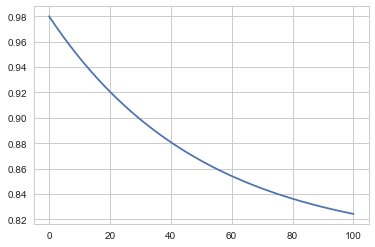

In [59]:
plt.plot(phi)

In [60]:
ftc = PorousMediaLab(L, dx, tend, dt, phi)

In [61]:
# C_init=0.0000001/phi/3
# ftc.add_species(is_solute=True, element='H2CO3', D=1e-5*60*60, init_C=C_init, bc_top=-1e-7, bc_top_type='flux', bc_bot=1e-7, bc_bot_type='flux')
# ftc.add_species(is_solute=True, element='HCO3', D=1e-5*60*60, init_C=C_init, bc_top=-1e-7, bc_top_type='flux', bc_bot=1e-7, bc_bot_type='flux')
# ftc.add_species(is_solute=True, element='CO3', D=1e-5*60*60, init_C=C_init, bc_top=-1e-7, bc_top_type='flux', bc_bot=1e-7, bc_bot_type='flux')
# ftc.add_acid(species=['H2CO3', 'HCO3', 'CO3'], pKa=[3.6, 10.32])

# ftc.add_species(is_solute=True, element='H3PO4', D=1e-5*60*60, init_C=C_init, bc_top=0.01, bc_top_type='dirichlet', bc_bot=0.001, bc_bot_type='flux')
# ftc.add_species(is_solute=True, element='H2PO4', D=1e-5*60*60, init_C=C_init, bc_top=0.01, bc_top_type='dirichlet', bc_bot=0.001, bc_bot_type='flux')
# ftc.add_species(is_solute=True, element='HPO4', D=1e-5*60*60, init_C=C_init, bc_top=0.01, bc_top_type='dirichlet', bc_bot=0.001, bc_bot_type='flux')
# ftc.add_species(is_solute=True, element='PO4', D=1e-5*60*60, init_C=C_init, bc_top=0.01, bc_top_type='dirichlet', bc_bot=0.001, bc_bot_type='flux')


ftc.add_species(is_solute=True, element='Ca', D=1e-5*60*60, init_C=1, bc_top=1, bc_top_type='dirichlet', bc_bot=1, bc_bot_type='dirichlet')
# ftc.add_species(is_solute=False, element='CaCO3', D=1e-16, init_C=0.1, bc_top=0.0, bc_top_type='flux', bc_bot=0.00, bc_bot_type='flux')


# ftc.add_acid(species=['H3PO4', 'H2PO4', 'HPO4', 'PO4'], pKa=[2.148, 7.198, 12.319])
# ftc.add_ion(element='Ca', charge=2)

In [62]:
# ftc.constants['Ks'] = 5e-9
# ftc.constants['k_dis'] = 1e-3
# ftc.constants['k_pre'] = 1e-3
# ftc.constants['CF'] = (1-phi)/phi  ### conversion factor

In [63]:
# ftc.rates['R_dis'] = 'k_dis * CaCO3 * (Ca*CO3/Ks < 1)'
# ftc.rates['R_pre'] = 'k_pre * Ca * (Ca*CO3/Ks > 1)'

In [64]:
# ftc.dcdt['CaCO3'] = '-R_dis/CF + R_pre/CF'
# ftc.dcdt['Ca'] = 'R_dis*CF - R_pre*CF'
# ftc.dcdt['CO3'] = 'R_dis*CF - R_pre*CF'

In [65]:
# %%timeit
ftc.solve()

Simulation starts  with following params:
	tend = 10.0,
	dt = 1.00e-01,
	L = 10.0,
	dx = 1.00e-01,
	w = 0.00
Simulation started:
	 2017-08-14 20:38:44


Estimated time of the code execution:
	 0h:00m:00s
Will finish approx.:
	 2017-08-14 20:38:44


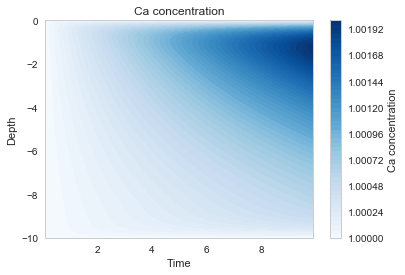

In [66]:
ftc.plot_contourplots(labels=False)

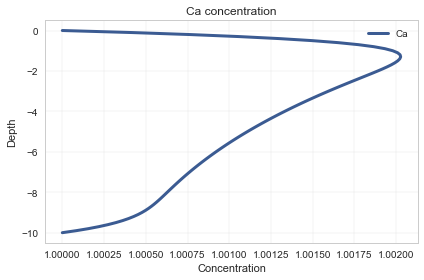

In [67]:
ftc.plot_profiles()

In [68]:
ftc.profiles.Ca

array([ 1.        ,  1.0004146 ,  1.00076529,  1.00105832,  1.00129983,
        1.00149579,  1.0016519 ,  1.00177351,  1.00186561,  1.00193273,
        1.00197898,  1.00200799,  1.00202294,  1.00202659,  1.00202128,
        1.00200897,  1.00199129,  1.00196957,  1.00194486,  1.00191802,
        1.00188971,  1.00186045,  1.00183061,  1.00180049,  1.00177031,
        1.00174022,  1.00171034,  1.00168073,  1.00165146,  1.00162256,
        1.00159406,  1.00156596,  1.00153828,  1.00151101,  1.00148417,
        1.00145774,  1.00143173,  1.00140613,  1.00138094,  1.00135615,
        1.00133177,  1.00130777,  1.00128417,  1.00126095,  1.00123812,
        1.00121565,  1.00119356,  1.00117184,  1.00115048,  1.00112947,
        1.00110881,  1.0010885 ,  1.00106854,  1.00104891,  1.00102962,
        1.00101065,  1.000992  ,  1.00097368,  1.00095567,  1.00093797,
        1.00092058,  1.00090348,  1.00088669,  1.00087018,  1.00085396,
        1.00083803,  1.00082238,  1.000807  ,  1.00079189,  1.00

In [69]:
>>> from pHcalc import Acid, Neutral, System
>>> carbonic = Acid(pKa=[3.6, 10.32], charge=0, conc=0.0000001)
>>> system = System(carbonic)
>>> system.pHsolve()
>>> print(system.pH) # Should print 2.8343772

6.79108200073


In [70]:
>>> from scipy.sparse import spdiags
>>> data = np.array([[1, 2, 3, 4], [1, 2, 3, 4], [1, 2, 3, 4]])
>>> diags = np.array([-1, 0, 1])
>>> spdiags(data, diags, 4, 4).toarray()

array([[1, 2, 0, 0],
       [1, 2, 3, 0],
       [0, 2, 3, 4],
       [0, 0, 3, 4]])